## 資料前置處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [3]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

## 建立模型

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [9]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## 進行訓練

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot, 
                          validation_split = 0.2,
                          epochs = 10, 
                          batch_size = 200,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4380 - acc: 0.8828 - val_loss: 0.2183 - val_acc: 0.9404
Epoch 2/10
 - 2s - loss: 0.1910 - acc: 0.9454 - val_loss: 0.1559 - val_acc: 0.9556
Epoch 3/10
 - 2s - loss: 0.1355 - acc: 0.9618 - val_loss: 0.1259 - val_acc: 0.9651
Epoch 4/10
 - 2s - loss: 0.1026 - acc: 0.9702 - val_loss: 0.1118 - val_acc: 0.9680
Epoch 5/10
 - 2s - loss: 0.0810 - acc: 0.9773 - val_loss: 0.0981 - val_acc: 0.9715
Epoch 6/10
 - 2s - loss: 0.0659 - acc: 0.9820 - val_loss: 0.0935 - val_acc: 0.9724
Epoch 7/10
 - 2s - loss: 0.0544 - acc: 0.9850 - val_loss: 0.0912 - val_acc: 0.9738
Epoch 8/10
 - 2s - loss: 0.0459 - acc: 0.9877 - val_loss: 0.0828 - val_acc: 0.9763
Epoch 9/10
 - 2s - loss: 0.0379 - acc: 0.9903 - val_loss: 0.0824 - val_acc: 0.9758
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9917 - val_loss: 0.0808 - val_acc: 0.9760


In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,
                       train,
                       validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

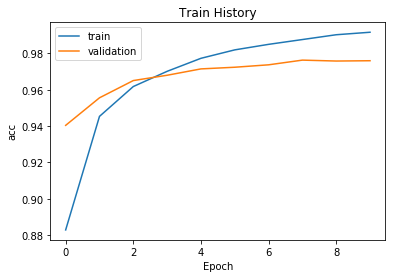

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

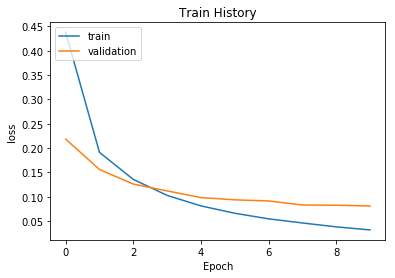

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

## 以測試資料評估模型準確率

In [16]:
score = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', score[1])

10000/10000 [==============================] - 1s 54us/step

accuracy = 0.9757


## 進行預測

In [17]:
prediction = model.predict_classes(x_Test)

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
def plot_images_labels_prediction(images, 
                                  labels,
                                  prediction,
                                  idx,
                                  num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = f"label = {labels[idx]}"
        if len(prediction) > 0:
            title += f", predict = {prediction[idx]}"
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

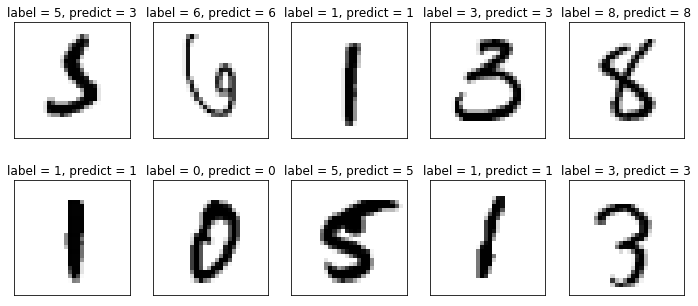

In [20]:
plot_images_labels_prediction(x_test_image, 
                              y_test_label,
                              prediction,
                              idx = 340)

## 顯示混淆矩陣

In [21]:
import pandas as pd
pd.crosstab(y_test_label,
            prediction,
            rownames = ['label'],
            colnames=['predic'])

predic,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,2,1,0,2,3,9,0
3,0,0,2,995,0,0,0,4,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,15,1,854,7,1,8,3
6,5,3,2,1,3,3,939,0,2,0
7,0,5,13,7,1,0,0,987,6,9
8,5,0,3,6,0,1,1,2,955,1


In [22]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [23]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


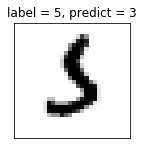

In [24]:
plot_images_labels_prediction(x_test_image, 
                              y_test_label,
                              prediction,
                              idx = 340,
                              num = 1)

In [25]:
del model
model = Sequential()

In [26]:
model.add(Dense(units = 1000,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [27]:
model.add(Dense(units=10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [28]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [30]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot, 
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.2906 - acc: 0.9164 - val_loss: 0.1531 - val_acc: 0.9565
Epoch 2/10
 - 6s - loss: 0.1149 - acc: 0.9671 - val_loss: 0.1218 - val_acc: 0.9635
Epoch 3/10
 - 6s - loss: 0.0734 - acc: 0.9793 - val_loss: 0.0916 - val_acc: 0.9731
Epoch 4/10
 - 7s - loss: 0.0517 - acc: 0.9854 - val_loss: 0.0809 - val_acc: 0.9749
Epoch 5/10
 - 7s - loss: 0.0358 - acc: 0.9905 - val_loss: 0.0833 - val_acc: 0.9746
Epoch 6/10
 - 7s - loss: 0.0247 - acc: 0.9939 - val_loss: 0.0739 - val_acc: 0.9785
Epoch 7/10
 - 7s - loss: 0.0183 - acc: 0.9956 - val_loss: 0.0725 - val_acc: 0.9779
Epoch 8/10
 - 7s - loss: 0.0133 - acc: 0.9968 - val_loss: 0.0751 - val_acc: 0.9786
Epoch 9/10
 - 6s - loss: 0.0100 - acc: 0.9980 - val_loss: 0.0724 - val_acc: 0.9797
Epoch 10/10
 - 6s - loss: 0.0070 - acc: 0.9989 - val_loss: 0.0789 - val_acc: 0.9778


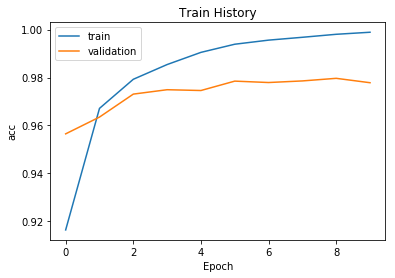

In [31]:
show_train_history(train_history, 'acc', 'val_acc')

In [32]:
score = model.evaluate(x_Test_normalize, 
                       y_Test_OneHot)
print()
print('accuracy =', score[1])

10000/10000 [==============================] - 1s 95us/step

accuracy = 0.9796


## 多層感知器加入DropOut功能以避免 overfitting

In [33]:
from keras.layers import Dropout

In [34]:
del model
model = Sequential()

In [35]:
model.add(Dense(units = 1000,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [36]:
model.add(Dropout(0.5))

In [37]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot, 
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3530 - acc: 0.8944 - val_loss: 0.1617 - val_acc: 0.9545
Epoch 2/10
 - 7s - loss: 0.1596 - acc: 0.9535 - val_loss: 0.1169 - val_acc: 0.9656
Epoch 3/10
 - 7s - loss: 0.1147 - acc: 0.9664 - val_loss: 0.0970 - val_acc: 0.9705
Epoch 4/10
 - 7s - loss: 0.0909 - acc: 0.9729 - val_loss: 0.0866 - val_acc: 0.9730
Epoch 5/10
 - 7s - loss: 0.0743 - acc: 0.9774 - val_loss: 0.0798 - val_acc: 0.9765
Epoch 6/10
 - 8s - loss: 0.0635 - acc: 0.9794 - val_loss: 0.0747 - val_acc: 0.9778
Epoch 7/10
 - 7s - loss: 0.0544 - acc: 0.9838 - val_loss: 0.0748 - val_acc: 0.9780
Epoch 8/10
 - 7s - loss: 0.0465 - acc: 0.9854 - val_loss: 0.0702 - val_acc: 0.9795
Epoch 9/10
 - 7s - loss: 0.0425 - acc: 0.9863 - val_loss: 0.0688 - val_acc: 0.9800
Epoch 10/10
 - 7s - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0661 - val_acc: 0.9812


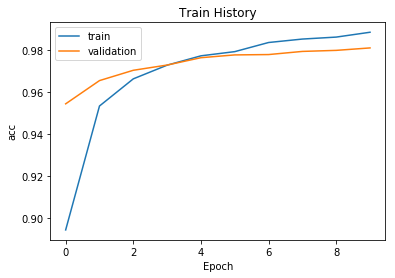

In [41]:
show_train_history(train_history, 'acc', 'val_acc')

In [42]:
score = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', score[1])

10000/10000 [==============================] - 1s 108us/step

accuracy = 0.9812


## 建立多層感知器模型包含2個隱藏層

In [43]:
del model
model = Sequential()

In [44]:
model.add(Dense(units = 1000,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [45]:
model.add(Dropout(0.5))

In [46]:
model.add(Dense(units = 1000,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [47]:
model.add(Dropout(0.5))

In [48]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [49]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [51]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot, 
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 17s - loss: 0.3753 - acc: 0.8832 - val_loss: 0.1324 - val_acc: 0.9610
Epoch 2/10
 - 17s - loss: 0.1611 - acc: 0.9499 - val_loss: 0.0975 - val_acc: 0.9703
Epoch 3/10
 - 18s - loss: 0.1188 - acc: 0.9635 - val_loss: 0.0902 - val_acc: 0.9732
Epoch 4/10
 - 17s - loss: 0.0993 - acc: 0.9699 - val_loss: 0.0775 - val_acc: 0.9763
Epoch 5/10
 - 17s - loss: 0.0811 - acc: 0.9737 - val_loss: 0.0756 - val_acc: 0.9764
Epoch 6/10
 - 17s - loss: 0.0765 - acc: 0.9753 - val_loss: 0.0744 - val_acc: 0.9777
Epoch 7/10
 - 18s - loss: 0.0663 - acc: 0.9786 - val_loss: 0.0734 - val_acc: 0.9784
Epoch 8/10
 - 19s - loss: 0.0612 - acc: 0.9799 - val_loss: 0.0713 - val_acc: 0.9793
Epoch 9/10
 - 19s - loss: 0.0554 - acc: 0.9816 - val_loss: 0.0768 - val_acc: 0.9793
Epoch 10/10
 - 18s - loss: 0.0526 - acc: 0.9825 - val_loss: 0.0743 - val_acc: 0.9797


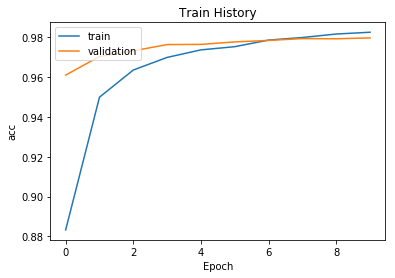

In [52]:
show_train_history(train_history, 'acc', 'val_acc')

In [53]:
score = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy =', score[1])

10000/10000 [==============================] - 2s 168us/step

accuracy = 0.9803
